In [19]:
import numpy as np
from scipy import stats

In [1]:
#sample error calculation
def sample_error(std_dev,sample_size):
    return (std_dev/np.sqrt(sample_size))

In [5]:
#Z-score calculation
def z_test(sample_mean,pop_mean,std_error):
    return((sample_mean-pop_mean)/std_error)

In [27]:
#T-test

def t_test(sample_mean,pop_mean,std_error):
    return((sample_mean-pop_mean)/std_error)

In [72]:
## Z-stat two means

def z_stat_twomeans(mean1,mean2,std_error):
    return(mean1-mean2/std_error)

In [73]:
### sample error two means
def sample_error_twomeans(s1,n1,s2,n2):
    return (np.sqrt((s1**2/n1)+(s2**2/n2)))

#### Problem Statement 1:

In each of the following situations, state whether it is a correctly stated hypothesis
testing problem and why?
1. H0: μ = 25, H1: μ ≠ 25
2. H0: σ > 10, H1: σ = 10
3. H0: x = 50, H1: x ≠ 50
4. H0: p = 0.1, H1: p = 0.5
5. H0: s = 30, H1: s > 30

1. H0: μ = 25, H1: μ ≠ 25  -> Correctly stated and it is a two-tailed test (μ < 25 or μ > 25)
2. H0: σ > 10, H1: σ = 10  ->  This is incorrect , H1 should have been σ < 10 [If the original claim does not include equality (<, not equal, >) then the null hypothesis is the complement of the original claim. The null hypothesis always includes the equal sign. The decision is based on the null hypothesis. ]
3. H0: x = 50, H1: x ≠ 50 -> No, the mean here refer to sample mean and the hypothesis is always about the population or distribution that we are looking at.
4. H0: p = 0.1, H1: p = 0.5 -> Incorrect, This hypothesis talks about two different scenario.H1 should have been p ≠ 0.1 
5. H0: s = 30, H1: s > 30 -> Incorrect, Hypothesis is always about the population not the sample


#### Problem Statement 2:
The college bookstore tells prospective students that the average cost of its
textbooks is Rs. 52 with a standard deviation of Rs. 4.50. A group of smart statistics
students thinks that the average cost is higher. To test the bookstore’s claim against
their alternative, the students will select a random sample of size 100. Assume that
the mean from their random sample is Rs. 52.80. Perform a hypothesis test at the
5% level of significance and state your decision.


Hypothesis 
-----------------
Ho: $\mu\$ = 52 

Ha: $\mu\$ != 52 (Two tailed test)

In [18]:
alpha = 0.05
pop_mean = 52
pop_std = 4.5
sample_size = 100
sample_mean = 52.8
sample_err = sample_error(pop_std,sample_size)
z_score = z_test(sample_mean,pop_mean,sample_err)


#calculating p-value ; since it is a two tailed test
p = 2*(1-(stats.norm.cdf(np.absolute(z_score))))
#stats.norm.sf(abs(z_score))*2 This also gives the value
print(p)
if p < alpha:
    print("Null Hypothesis rejected !Average cost is not 52")
else:
    print("Null hypothesis is accepted ! Average cost is 52")



0.0754403596268014
Null hypothesis is accepted ! Average cost is 52
1.959963984540054


0.07544035962680146

#### Problem Statement 3:
A certain chemical pollutant in the Genesee River has been constant for several
years with mean μ = 34 ppm (parts per million) and standard deviation σ = 8 ppm. A
group of factory representatives whose companies discharge liquids into the river is
now claiming that they have lowered the average with improved filtration devices. A
group of environmentalists will test to see if this is true at the 1% level of
significance. Assume \ that their sample of size 50 gives a mean of 32.5 ppm.
Perform a hypothesis test at the 1% level of significance and state your decision.


Hypothesis 
-----------------
Ho: $\mu\$ = 34 

Ha: $\mu\$ < 34(Left tailed test)

In [24]:
pop_mean = 34
std_dev = 8
alpha = 0.01
sample_size = 50
sample_mean = 32.5
sample_err = sample_error(std_dev,sample_size)
z_score = z_test(sample_mean,pop_mean,sample_err)

#calculating critical value /p-value for 1% aplha
p_value = stats.norm.cdf(abs(z_score))
print(p_value)  ## stats.norm.sf(z_score)

if p < alpha:
    print("Null Hypothesis rejected !Average is less than 34")
else:
    print("Null hypothesis is accepted ! Average is 34")

0.9075512005172
Null hypothesis is accepted ! Average is 34


#### Problem Statement 4:

Based on population figures and other general information on the U.S. population,
suppose it has been estimated that, on average, a family of four in the U.S. spends
about $1135 annually on dental expenditures. Suppose further that a regional dental
association wants to test to determine if this figure is accurate for their area of
country. To test this, 22 families of 4 are randomly selected from the population in
that area of the country and a log is kept of the family’s dental expenditure for one
year. The resulting data are given below. Assuming, that dental expenditure is
normally distributed in the population, use the data and an alpha of 0.5 to test the
dental association’s hypothesis.
1008, 812, 1117, 1323, 1308, 1415, 831, 1021, 1287, 851, 930, 730, 699,
872, 913, 944, 954, 987, 1695, 995, 1003, 994

Hypothesis 
-----------------
Ho: $\mu\$ = 1135

Ha: $\mu\$ != 1135 (Two tailed)

In [36]:
#  sample size <30 and population variance is not given and as the sample is derived from a normal population we can use t-test

pop_mean = 1135
sample_size = 22 
alpha = 0.5 
samp_data=np.array([1008,812,1117,1323,1308,1415,831,1021,1287,851,930,730,699,872,913,944,954,987,1695,995,1003,994])
samp_mean=np.mean(samp_data)
samp_std=np.std(samp_data)
t=t_test(pop_mean=1135,sample_mean=samp_mean,std_error=sample_error(samp_std,len(samp_data)))
p = (1 - stats.t.cdf(abs(t), df = len(samp_data)-1)) * 2
print([t,p])
###Easier way
stats.ttest_1samp(samp_data, pop_mean, axis=0, nan_policy='propagate', alternative='two-sided')

if p < alpha:
    print("Null Hypothesis rejected !Average is not equal to $1135")
else:
    print("Null hypothesis is accepted ! Average is $1135")

[-2.070747228595759, 0.050898290089189]
Null Hypothesis rejected !Average is not equal to $1135


#### Problem Statement 5:
In a report prepared by the Economic Research Department of a major bank the
Department manager maintains that the average annual family income on Metropolis
is \\$ 48,432. What do you conclude about the validity of the report if a random sample
of 400 families shows and average income of \\$48,574 with a standard deviation of
2000?

Hypothesis 
-----------------

H0 : Average Family Income on Metropolis is $48,432(𝜇=48,432)

H1 : 𝜇!=48432(Two-Tailed test)

In [38]:
pop_mean = 48432
sample_size = 400
sample_mean = 48574
std_dev = 2000
alpha = 0.05   #At 5% significance level assumption

sample_err = sample_error(std_dev,sample_size)
z_score = z_test(sample_mean,pop_mean,sample_err)

#calculating critical value /p-value 
p_value = stats.norm.cdf(abs(z_score))
if p_value<alpha:
    print("Null Hypothesis is rejected(Average family income of metropolis is not $48432)")
else:
    print("Null Hypothesis is accepted(Average family income of metropolis is $48432)")

Null Hypothesis is accepted(Average family income of metropolis is $48432)


#### Problem Statement 6:

Suppose that in past years the average price per square foot for warehouses in the
United States has been \\$32.28. A national real estate investor wants to determine
whether that figure has changed now. The investor hires a researcher who randomly
samples 19 warehouses that are for sale across the United States and finds that the
mean price per square foot is \\$31.67, with a standard deviation of \\$1.29. assume
that the prices of warehouse footage are normally distributed in population. If the
researcher uses a 5% level of significance, what statistical conclusion can be
reached? What are the hypotheses?

In [ ]:
Hypothesis 
-----------------

H0 : 𝜇=32.28

H1 : 𝜇!=32.28(Two-Tailed test)

In [47]:
pop_mean = 32.28
sample_size = 19 # hence t-test
sample_mean = 31.67
std_dev = 1.29
alpha = 0.05
t=t_test(pop_mean=1135,sample_mean=samp_mean,std_error=sample_error(samp_std,len(samp_data)))
p = (1 - stats.t.cdf(abs(t), df = len(samp_data)-1)) * 2
if p < alpha :
    print("Null hypothesis rejected ! 𝜇!=32.28")
else:
    print("Null hypothesis accepted ! 𝜇=32.28")

Null hypothesis accepted ! 𝜇=32.28


#### Problem Statement 7:
Fill in the blank spaces in the table and draw your conclusions from it

|Acceptance region | Sample size #  | $\alpha $   | $\beta $ at $\mu $ = 52  |  $\beta $ at $\mu $ = 52  |
|---:|:-------------|:-----------|:------|:------|
| 48.5 < $\bar x$  51.5  | 10 
| 48 < $\bar x$  52  | 10 
| 48.81 < $\bar x$  51.9  | 10
| 48.42 < $\bar x$  51.58 | 10

#### Problem Statement :

Find the t-score for a sample size of 16 taken from a population with mean 10 when
the sample mean is 12 and the sample standard deviation is 1.5?

In [50]:
n=16
pop_mean = 10
sample_mean = 12
std_deviation = 1.5

print("t-score:",t_test(sample_mean,pop_mean,std_error = sample_error(std_deviation,n)))


t-score: 5.333333333333333


#### Problem Statement 9:

Find the t-score below which we can expect 99% of sample means will fall if samples
of size 16 are taken from a normally distributed population.

In [56]:
n=16
#99% confidence ,so alpha = 1-0.99 =0.01
alpha = 0.01
dof = n - 1
t_score = stats.t.ppf(0.99,dof)
print(t_score)

2.602480294995493


#### Problem Statement 10:
If a random sample of size 25 drawn from a normal population gives a mean of 60
and a standard deviation of 4, find the range of t-scores where we can expect to find
the middle 95% of all sample means. Compute the probability that (−t0.05 <t<t0.10).

In [62]:
mean = 60
n = 25
std= 4
alpha=(1-0.95)/2
t_score=stats.t.ppf(1-alpha,df=24)
print(f"Range is : {mean-t_score*(std/(n**0.5))} {mean+t_score*(std/(n**0.5))}")

Range is : 58.348881150697586 61.651118849302414


In [70]:
p=stats.t.cdf(0.1,df=n-1) - stats.t.cdf(-0.05,df=n-1)
print(f"probability that (−t0.05 <t<t0.10):{p}")

probability that (−t0.05 <t<t0.10):0.05914441613731247


#### Problem Statement 11:
Two-tailed test for difference between two population means
Is there evidence to conclude that the number of people travelling from Bangalore to
Chennai is different from the number of people travelling from Bangalore to Hosur in
a week, given the following:
Population 1: Bangalore to Chennai n1 = 1200
x1 = 452
s1 = 212
Population 2: Bangalore to Hosur n2 = 800
x2 = 523
s2 = 185

In [71]:
n1=1200
x1=452
s1=212

n2=800
x2=523
s2=185


#### Hypothesis:

H0: number of people travelling from Bangalore to
Chennai is same as  from the number of people travelling from Bangalore to Hosur in
a week(𝜇1=𝜇2)

H1:number of people travelling from Bangalore to
Chennai is different from the number of people travelling from Bangalore to Hosur in
a week(𝜇1!=𝜇2)

In [93]:
## Sample size is above 30, so we use z-test

std_err = sample_error_twomeans(s1,n1,s2,n2)
z_score = z_stat_twomeans(x1,x2,std_err)
#z_score
alpha = 0.05
p=2*(1-stats.norm.cdf(x=np.absolute(z_score)))

if p<alpha:
    print("Null Hypothesis is rejected(number of people travelling from Bangalore to Chennai is different from the number of people travelling from Bangalore to Hosur in a week(𝜇1!=𝜇2)")
else:
    print('Null Hypothesis is accepted(number of people travelling from Bangalore to Chennai is same as  from the number of people travelling from Bangalore to Hosur in a week(𝜇1=𝜇2))')

Null Hypothesis is rejected(number of people travelling from Bangalore to Chennai is different from the number of people travelling from Bangalore to Hosur in a week(𝜇1!=𝜇2)


#### Problem Statement 12:
Is there evidence to conclude that the number of people preferring Duracell battery is
different from the number of people preferring Energizer battery, given the following:
Population 1: Duracell
n1 = 100
x1 = 308
s1 = 84
Population 2: Energizer
n2 = 100
x2 = 254
s2 = 67

In [94]:
n1=100
x1=308
s1=84

n2=100
x2=254
s2=67


#### Hypothesis:

H0: number of people preferring Duracell battery is same as Energizer battery(𝜇1=𝜇2)

H1: number of people preferring Duracell battery is not same as Energizer battery (𝜇1!=𝜇2)
    

In [99]:
alpha =0.05
z_score = z_stat_twomeans(x1,x2,sample_error_twomeans(s1,n1,s2,n2))
z_score
p=2*(1-stats.norm.cdf(np.absolute(z_score)))
if p < alpha:
    print("Null hypothesis is rejected ! Duracell preference not equal to Energizer")
else:
    print("Null hypothesis is accepted ! Duracell preference is equal to Energizer")

Null hypothesis is rejected ! Duracell preference not equal to Energizer


#### Problem Statement 13:
Pooled estimate of the population variance
Does the data provide sufficient evidence to conclude that average percentage
increase in the price of sugar differs when it is sold at two different prices?

Population 1: Price of sugar = Rs. 27.50 n1 = 14
x1 = 0.317%
s1 = 0.12%

Population 2: Price of sugar = Rs. 20.00 n2 = 9
x2 = 0.21%
s2 = 0.11%

In [111]:

n1=14
x1=0.317
s1=0.12

n2=9
x2=0.21
s2=0.11



#### Hypothesis:

H0: Average percentage increase in the price of sugar is same when it is sold at two different prices.

H1: Average percentage increase in the price of sugar differs when it is sold at two different prices.

In [126]:
#Since sample size is small,we will use t-test
def estimate_std_deviation(n1,s1,n2,s2):
    return np.sqrt(((n1*s1**2)+(n2*s2**2))/(n1+n2-2))
estd_std_dev = estimate_std_deviation(n1,s1,n2,s2)
t=z_stat_twomeans(0.317,0.21,sample_error_twomeans(s1=estd_std_dev,s2=estd_std_dev,n1=14,n2=9))
p=2*(1-stats.t.cdf(x=np.absolute(t),df=14+9-2))

if p<alpha:
    print("Null Hypothesis is rejected(Average percentage increase in the price of sugar differs when it is sold at two different prices.)")
else:
    print("Null Hypothesis is accepted(Average percentage increase in the price of sugar is same when it is sold at two different prices.)")

Null Hypothesis is accepted(Average percentage increase in the price of sugar is same when it is sold at two different prices.)


#### Problem Statement 14:
The manufacturers of compact disk players want to test whether a small price
reduction is enough to increase sales of their product. Is there evidence that the
small price reduction is enough to increase sales of compact disk players?

Population 1: Before reduction
n1 = 15
x1 = Rs. 6598 s1 = Rs. 844

Population 2: After reduction n2 = 12
x2 = RS. 6870
s2 = Rs. 669

#### Hypothesis:

Ho: Average sales before and after reduction is almost same(𝜇2 - 𝜇1 <=0)

H1: 𝜇2>𝜇1(Average Sales after reduction increased)(One Tailed Test)

In [134]:
n1=15
x1=6598
s1=844

n2=12
x2=6870
s2=669

alpha = 0.05
estd_std_dev = estimate_std_deviation(n1,s1,n2,s2)
print(estd_std_dev)
t=z_stat_twomeans(6598,6870,sample_error_twomeans(estd_std_dev,estd_std_dev,15,12))
print(t)
p=1-(stats.t.cdf(x=t,df=15+12-1))
if p<alpha:
    print("Null Hypothesis is rejected(Average Sales after reduction increased)")
else: 
    print("Null Hypothesis is accepted(Average Sales before and after reduction is same or less)")

801.3930870677635
-9.497823390503818
Null Hypothesis is accepted(Average Sales before and after reduction is same or less)


#### Problem Statement 15:
Comparisons of two population proportions when the hypothesized difference is zero
Carry out a two-tailed test of the equality of banks’ share of the car loan market in
1980 and 1995.

Population 1: 1980
n1 = 1000
x1 = 53
p 1 = 0.53

Population 2: 1985
n2 = 100
x2 = 43
p 2= 0.53

#### Hypothesis:

Ho : Banks share of the car loan market in 1980 and 1995 is equal(P1=P2)

H1 : Banks share of the car loan market in 1980 and 1995 is not equal(P1!=P2)(Two-Tailed test)

In [136]:
n1 = 1000
x1 = 53 
p1 = 0.53

n2 = 100 
x2 = 43 
p2= 0.53

def z_test_pop_proportions(p1,p2,se):
    return ((p1-p2)/se)
def sample_error_pop_proportions(p1,p2,n1,n2):
    return np.sqrt(((p1*(1-p1))/n1)+((p2*(1-p2))/n2))

alpha=0.05
p1=53/1000
p2=43/100
z=z_test_pop_proportions(p1=p1,p2=p2,se=sample_error_pop_proportions(p1=p1,p2=p2,n1=1000,n2=100))
p=2*(1-stats.norm.cdf(x=np.absolute(z)))
if p<alpha:
    print("Null Hypothesis is rejected(Banks share of the car loan market in 1980 and 1995 is not equal(P1!=P2))")
else:
    print("Null Hypothesis is accepted(Banks share of the car loan market in 1980 and 1995 is equal(P1=P2))")

Null Hypothesis is rejected(Banks share of the car loan market in 1980 and 1995 is not equal(P1!=P2))


#### Problem Statement 16:
Carry out a one-tailed test to determine whether the population proportion of
traveler’s check buyers who buy at least $2500 in checks when sweepstakes prizes
are offered as at least 10% higher than the proportion of such buyers when no
sweepstakes are on.

Population 1: With sweepstakes
n1 = 300
x1 = 120
p = 0.40

Population 2: No sweepstakes n2 = 700
x2 = 140
p 2= 0.20

#### Hypothesis:

H0: P1-P2>=0.1(the population proportion of traveler’s check buyers who buy at least $2500 in checks when sweepstakes prizes are offered as at least 10% higher than the proportion of such buyers when no sweepstakes are on.)

H1 : P1-P2<0.1(Left-tailed test)

In [137]:
alpha=0.05
se=sample_error_pop_proportions(p1=0.4,p2=0.2,n1=300,n2=140)
z=((0.4-0.2-0.1)/se)
p=stats.norm.cdf(z)
if p<alpha:
    print("Null Hypothesis is rejected")
else:
    print("Null Hypothesis is accepted(the population proportion of traveler’s check buyers who buy at least $2500 in checks when sweepstakes prizes are offered as at least 10% higher than the proportion of such buyers when no sweepstakes are on)")

Null Hypothesis is accepted(the population proportion of traveler’s check buyers who buy at least $2500 in checks when sweepstakes prizes are offered as at least 10% higher than the proportion of such buyers when no sweepstakes are on)


#### Problem Statement 17:

A die is thrown 132 times with the following results: Number turned up: 1, 2, 3, 4, 5, 6
Frequency: 16, 20, 25, 14, 29, 28
Is the die unbiased? Consider the degrees of freedom as p − 1.

#### Hypothesis:

H0: The dice is unbiased

H1: The dice is biased

In [140]:
##### If a die is unbiased then the probabilities of getting 1,2,3,4,5,6 must be equal to 1/6.
##### So the expected frequencies of 1,2,3,4,5,6 for 132 trails must be 22(22/132=1/6)

observed=np.array([16,20,25,14,29,28])
expected=np.array([22,22,22,22,22,22])

chi,p=stats.chisquare(f_obs=observed,f_exp=expected)
alpha = 0.05
if p<alpha:
    print("Null Hypothesis is rejected(Dice is biased)")
else:
    print("Null Hypothesis is accepted(Dice is unbiased)")

Null Hypothesis is accepted(Dice is unbiased)


#### Problem Statement 18:

Problem Statement 18:
In a certain town, there are about one million eligible voters. A simple random
sample of 10,000 eligible voters was chosen to study the relationship between
gender and participation in the last election. The results are summarized in the
following 2X2 (read two by two) contingency table:

| :: | Men | Women  |
|---:|:-------------|:-----------|
| Voted | 2792 | 3591
| Not Voted | 1486 |2131

We would want to check whether being a man or a woman (columns) is independent of
having voted in the last election (rows). In other words, is “gender and voting independent”?

#### Hypothesis:

H0 :Gender and voting is independent

H1 : Gender and voting are dependent

In [141]:
#We use a chi-square test using contigency table
alpha=0.05
data=np.array([[2792,3591],[1486,2131]])
chi2,p,dof,expected=stats.chi2_contingency(data)
print("The expected values are :",expected)
if p<alpha:
    print("Null Hypothesis is rejected(Gender and voting are dependent)")
else:
    print("Null Hypothesis is accepted(Gender and voting is independent)")

The expected values are : [[2730.6474 3652.3526]
 [1547.3526 2069.6474]]
Null Hypothesis is rejected(Gender and voting are dependent)


#### Problem Statement 19:

A sample of 100 voters are asked which of four candidates they would vote for in an
election. The number supporting each candidate is given below:

| Higgins | Reardon | white  | Charlton |
|---:|:-------------|:-----------|:-------|
| 41| 19 | 24 | 16


Do the data suggest that all candidates are equally popular? [Chi-Square = 14.96,
with 3 df, p< 0.05 .


#### Hypothesis:

H0 : All candidates are equally popular

H1 : All candidates are not equally popular

In [143]:
alpha=0.05
obs=[41,19,24,16]
exp=[25,25,25,25]
chi,p=stats.chisquare(f_obs=obs,f_exp=exp)
if p<alpha:
    print("Null Hypothesis is rejected(All candidates are not equally popular)")
else:
    print("Null Hypothesis is accepted(All candidates are equally popular)")

Null Hypothesis is rejected(All candidates are not equally popular)


#### Problem Statement 20:

Children of three ages are asked to indicate their preference for three photographs of
adults. Do the data suggest that there is a significant relationship between age and
photograph preference? What is wrong with this study? [Chi-Square = 29.6, with 4
df: p < 0.05].

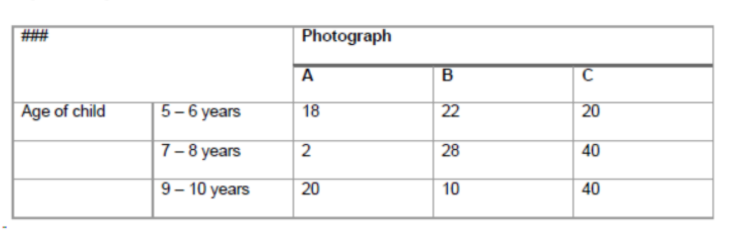



#### Hypothesis:

H0 : There is no significant relationship between age and photograph preference.

H1 : There is a significant relationship between age and photograph preference. 

In [145]:
alpha=0.05
data=np.array([[18,22,20],[2,28,40],[20,10,40]])
chi2,p,dof,expected=stats.chi2_contingency(data)
if p<alpha:
    print("Null Hypothesis is rejected(There is a significant relationship between age and photograph preference. )")
else:
    print("Null Hypothesis is accepted(There is no significant relationship between age and photograph preference.)")

Null Hypothesis is rejected(There is a significant relationship between age and photograph preference. )


#### Problem Statement 21:

A study of conformity using the Asch paradigm involved two conditions: one where
one confederate supported the true judgement and another where no confederate
gave the correct response.

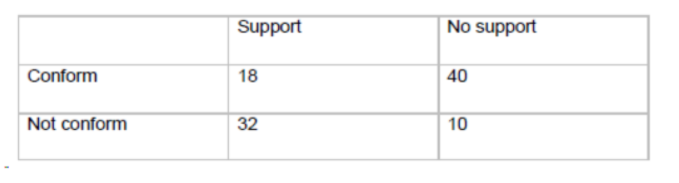

Is there a significant difference between the "support" and "no support" conditions in the
frequency with which individuals are likely to conform? [Chi-Square = 19.87, with 1 df:
p < 0.05].

#### Hypothesis:

H0 : There is no significant difference between the "support" and "no support" conditions in the
                     frequency with which individuals are likely to conform.
                     
H1 : There is a significant difference between the "support" and "no support" conditions in the
                            frequency with which individuals are likely to conform. 

In [147]:
alpha=0.05
data=np.array([[18,40],[32,10]])
chi2,p,dof,expected=stats.chi2_contingency(data)
if p<alpha:
    print("Null Hypothesis is rejected(There is a significant difference between the support and no support conditions in the frequency with which individuals are likely to conform.)")
else:
    print("Null Hypothesis is accepted(There is no significant difference between the support and no support conditions in the frequency with which individuals are likely to conform.)")

Null Hypothesis is rejected(There is a significant difference between the support and no support conditions in the frequency with which individuals are likely to conform.)


#### Problem Statement 22:

We want to test whether short people differ with respect to their leadership qualities
(Genghis Khan, Adolf Hitler and Napoleon were all stature-deprived, and how many midget
MP's are there?) The following table shows the frequencies with which 43 short people and
52 tall people were categorized as "leaders", "followers" or as "unclassifiable". Is there a
relationship between height and leadership qualities?
[Chi-Square = 10.71, with 2 df: p < 0.01].

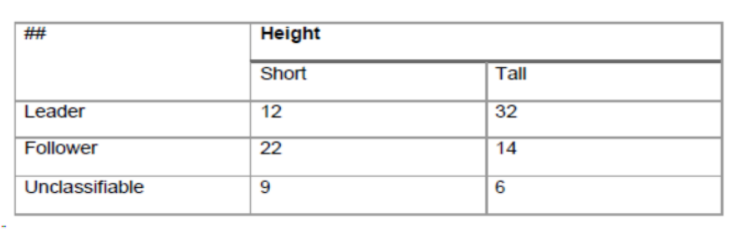

#### Hypothesis:

H0 : There is no relationship between height and leadership qualities.

H1 : There is a relationship between height and leadership qualities. 

In [149]:
alpha=0.01
data=np.array([[12,32],[22,14],[9,6]])
chi2,p,dof,expected=stats.chi2_contingency(data)
if p<alpha:
    print("Null Hypothesis is rejected(There is a relationship between height and leadership qualities.)")
else:
    print("Null Hypothesis is accepted(There is no relationship between height and leadership qualities.)")

Null Hypothesis is rejected(There is a relationship between height and leadership qualities.)


#### Problem Statement 23:

Each respondent in the Current Population Survey of March 1993 was classified as
employed, unemployed, or outside the labor force. The results for men in California age 35-
44 can be cross-tabulated by marital status, as follows:

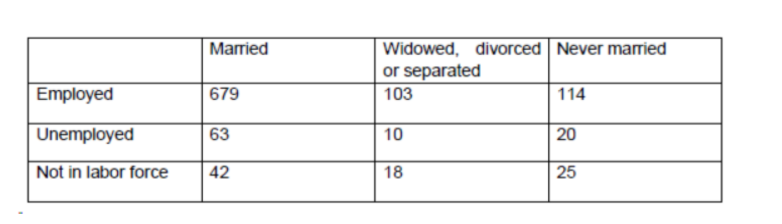

Men of different marital status seem to have different distributions of labor force status. Or is
this just chance variation? (you may assume the table results from a simple random
sample.)

#### Hypothesis:

H0: Marital status and employement status are independent.

H1 : Marital status and employement status are dependent.

In [151]:
alpha=0.05
data=np.array([[679,103,114],[63,10,20],[42,18,25]])
chi2,p,dof,expected=stats.chi2_contingency(data)
if p<alpha:
    print("Null Hypothesis is rejected(Marital status and employement status are dependent.)")
else:
    print("Null Hypothesis is accepted(Marital status and employement status are independent.)")

Null Hypothesis is rejected(Marital status and employement status are dependent.)
